In [3]:
import quantiacsToolbox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
import talib as ta
%matplotlib inline

(7152, 1)


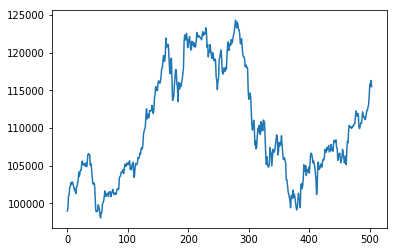

In [4]:
F_BP = pd.read_csv('./tickerData/F_BP.txt')
ALL_CLOSE = np.array(F_BP.loc[:, [' CLOSE']])
print(ALL_CLOSE.shape)
CLOSE = np.array(F_BP.loc[:504-1, [' CLOSE']])
plt.plot(CLOSE)
close = CLOSE.reshape(504)

In [5]:
# mom = ta.MOM(close, timeperiod=19)
# plt.plot(mom)
# print(mom.shape)

In [6]:
# roc = ta.ROC(close, timeperiod=10)
# plt.plot(roc)
# print(roc.shape)

In [7]:
# momentum = (CLOSE[20:] - CLOSE[:-20]) / CLOSE[:-20]
# plt.plot(momentum)
# print(momentum.shape)

In [8]:
# # get rid of nan values
# #mom = mom[np.isfinite(mom)] 
# indicators = ["Momentum", "Rate-Of-Chage"]
# data_temp = pd.DataFrame()
# data_temp[indicators[0]] = mom
# data_temp[indicators[1]] = roc 

In [9]:
# print(data_temp.shape)

In [10]:
# X = data_temp
# #remove NANs
# for i in range(0, len(indicators)):
#     X = X[np.isfinite(X[indicators[i]])]  
# x = np.array(X)


In [11]:
# print(x.reshape(970,1).shape)
# x = x.reshape(970,1)

In [12]:
# X = np.concatenate([x[:] for i in range(970)], axis=1).T
# print(X.shape)
# y = np.sign((x[:]).T[0])
# print(y.shape)

In [13]:
# clf = svm.SVC()
# clf.fit(X, y)
# clf.predict(x[:].T)

In [60]:
class myStrategy(object):

    def myTradingSystem(self, DATE, OPEN, HIGH, LOW, CLOSE, VOL, OI, P, R, RINFO, exposure, equity, settings):  

        # define helper function
        # use close price predict the trend of the next day
        def predict(CLOSE, gap):
            lookback = settings['lookback']           
            CLOSE = np.nan_to_num(CLOSE)
            close = CLOSE.reshape(lookback)
            #print(close)
            roc = ta.ROC(close, timeperiod=10)
            mom = ta.MOM(close, timeperiod=19)
            indicators = ["Momentum", "Rate-Of-Chage"]
            data_temp = pd.DataFrame()
            data_temp[indicators[0]] = mom
            data_temp[indicators[1]] = roc
            X = data_temp         
            #remove NANs
            for i in range(0, len(indicators)):
                X = X[np.isfinite(X[indicators[i]])]  
            
            X = np.array(X)
            new_shape = X.shape[0]*2
            X = X.reshape(new_shape,1)
            #print(X.shape)
            #X = np.concatenate([CLOSE[i:i + gap] for i in range(lookback - gap)], axis=1).T
            X = np.concatenate([X[i:i + gap] for i in range(lookback - gap)], axis=1).T
            #print(X.shape)
            y = np.sign((CLOSE[gap:lookback] - CLOSE[gap - 1:lookback - 1]).T[0])
                              
       
            y[y==0] = 1           
            clf = svm.SVC()           
            clf.fit(X, y)           
            y_pred = clf.predict(CLOSE[-gap:].T)              
            return y_pred

        nMarkets = len(settings['markets'])
        gap = settings['gap']

        pos = np.zeros((1, nMarkets), dtype='float')
        for i in range(nMarkets):
            try:
                pos[0, i] = predict(CLOSE[:, i].reshape(-1, 1),
                                    gap, )
             
                
            # for NaN data set position to 0
            except ValueError:
                pos[0, i] = 0.
     
        return pos, settings


    def mySettings(self):
        """ Define your trading system settings here """

        settings = {}

        # Futures Contracts
        settings['markets'] = ['F_CL','CASH','F_NG','F_HO','F_SB','F_RB','F_GC','F_C','F_W','F_S','F_HG','F_BO','F_SI',
'F_BO','F_CC','F_TY','F_FV','F_US','F_JY','F_TU','F_ES','F_ED']

        settings['lookback'] = 252
        settings['budget'] = 10 ** 6
        settings['slippage'] = 0.05

        settings['gap'] = 10

        return settings

copying data from cache
Evaluating Trading System


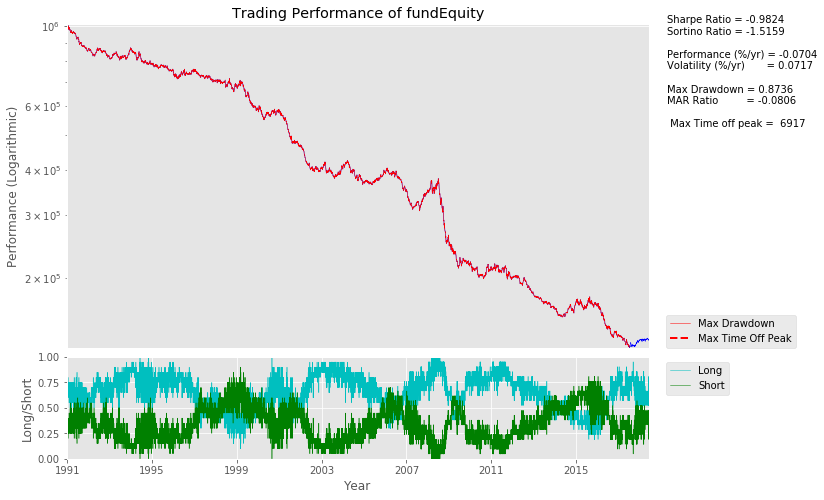

In [61]:
result = quantiacsToolbox.runts(myStrategy)